<a href="https://colab.research.google.com/github/Dennis-Kiarie/NAIROBI-HOSIPITAL-HYPOTHYROID-PREDICTION-SYSTEM/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2021_Dennis_Kiarie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

**a. Specifying the question**

To design a model that will predict if a patient has a hypothyroid, based on patient's symptoms data collected during medical camp by Nairobi Hospital.

**b. Defining Metric of Success**

The project will be considered a success if the models created are able to predict the patient's desease is hypothyroid, to an accuracy between 70-80% with lowest RMSE.



**c. Understanding the context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism.
Hypothyroidism (also called underactive thyroid, low thyroid or hypothyreosis) is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. Thyroid is responsible for providing energy to nearly every organ in the body.

It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, slow heart rate, depression, and weight gain.Occasionally there may be swelling of the front part of the neck due to goiter.Untreated cases of hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or congenital iodine deficiency syndrome.

Worldwide, too little iodine in the diet is the most common cause of hypothyroidism.Less common causes include previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, or previous thyroid surgery.The diagnosis of hypothyroidism, when suspected, can be confirmed with blood tests measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

Hypothyroidism is more common in women than in men.People over the age of 60 are more commonly affected.


**d. Recording Experimental Design**

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables.
We will also use the following machine learning algorithm to get the appropriate model:

**1.Decision Trees**

We will use the following trees to classify a whether a patient has hypothyroididm or tests negatively:

Random Forest Classifier

AdaBoost Classifier

Gradient Boost Classifier

The Adaboost and Gradient boost trees are optimization techniques for the random forest trees.

**2. SVM Models**

We will use the following SVM models to place a patient in the right category with regards to predicting their hypothyroidism status:

Polynomial

Linear

RBF

**e. Data Relevance**

We will be using data extracted from the healthcare datasets. This data was collected in a clinical camp conducted by Nairobi Hospital. The dataset to use for this project can be found by following this link:
 
http://bit.ly/hypothyroid_data

Below is the dataset columns:

Age, Sex, on_thyroxine, query_on_thyroxine,
on_antithyroid_medicationthyroid_surgery, query_hypothyroid,
query_hyperthyroid, pregnant, sick, tumor, lithium, goitre,
TSH_measured, TSH, T3_measured, T3, TT4_measured and TT4

# 2. Import Libraries

In [ ]:

# Loading the libraries needed for our workflow

import pandas as pd 
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# 3. Read the data

In [ ]:
#load the data from Fifa ranking dataset
patient = pd.read_csv('/content/hypothyroid.csv', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the data
patient

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


#4.  Checking the data

In [ ]:
#Determine the number of Records in our dataset
#
print("The rows and columns for the healthcare dataset: ",patient.shape)

The rows and columns for the healthcare dataset:  (3163, 26)


In [ ]:
# Checking whether each column has an appropriate datatype
#
print("Datatypes for healthcare dataset: ")
print(patient.dtypes)
print("*****************")

#we confirmed that all columns have object datatype

Datatypes for healthcare dataset: 
status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object
***************

In [ ]:
#Previewing the top of healthcare dataset
#
patient.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#previewing the bottom of housing dataset
patient.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


# 5.External Data Source Validation

#6. Tidying the dataset

In [ ]:
#check for duplicates
patient.duplicated().sum()

77

In [ ]:
# Drop all duplicates
patient.drop_duplicates(inplace=True)
#

#preview 
patient.duplicated().sum()

0

In [ ]:
#we confirm if the duplicate row has been dropped, we check the shape again

print('We now have ', patient.shape[0], 'rows and ', patient.shape[1], 'columns')

We now have  3086 rows and  26 columns


In [ ]:
# Check for unique values in each column
for col in patient.columns.to_list():
  print(f'{col} column unique values: \n')
  print(patient[col].unique(), end='\n')
  print('**********')
  print('\n')

status column unique values: 

['hypothyroid' 'negative']
**********


age column unique values: 

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
**********


sex column unique values: 

['M' 'F' '?']
**********


on_thyroxine column unique values: 

['f' 't']
**********


query_on_thyroxine column unique values: 

['f' 't']
**********


on_antithyroid_medication column unique values: 

['f' 't']
**********


thyroid_surgery column unique values: 

['f' 't']
**********


query_hypothyroid column unique values: 

['f' 't']
**********


query_hyperthyroid column unique values: 

In [ ]:
#checking for missing values
patient.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

We did not detect any missing values at this point yet we have a lot of questionmarks representing unrecorded values in our dataset so we will continue with more data cleaning procedure. 

In [ ]:
# More data cleaning procedures
#
#we replace the question marks with null values

variables =  ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# We then use a for loop to iterate through the columns listed above and apply the function to the columns
# where question marks are present and replace them as null values

for i in variables:
  patient[i] = patient[i].map(lambda x: np.nan if x == '?' else x)

#Python doesnot recognize questionmarks as null values so we replace them with nan

In [ ]:
#we check for null values to see if question marks has been replaced with null values
patient.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

We will keep Null values, explore and  model the Decision trees with missing values because Regression and Classification trees algorithms treat missing values as unique and other values when building predictive model.

These Null values wil be dealt with before preceding to SVM modelling.

In [ ]:
# We will now classify and group the numerical features and the categorical 
#and change the datatypes.
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numeric:
  patient[[col]] = patient[[col]].apply(pd.to_numeric)

patient.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [ ]:
#checking datatypes
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        2648 non-null   float64
 2   sex                        3013 non-null   object 
 3   on_thyroxine               3086 non-null   object 
 4   query_on_thyroxine         3086 non-null   object 
 5   on_antithyroid_medication  3086 non-null   object 
 6   thyroid_surgery            3086 non-null   object 
 7   query_hypothyroid          3086 non-null   object 
 8   query_hyperthyroid         3086 non-null   object 
 9   pregnant                   3086 non-null   object 
 10  sick                       3086 non-null   object 
 11  tumor                      3086 non-null   object 
 12  lithium                    3086 non-null   object 
 13  goitre                     3086 non-null   objec

#7. Exploratory Data Analysis

a. **Univariate Analysis**

In [ ]:
# we get proprotion of patient status
patient['status'].value_counts(normalize=True)*100

negative       95.430979
hypothyroid     4.569021
Name: status, dtype: float64

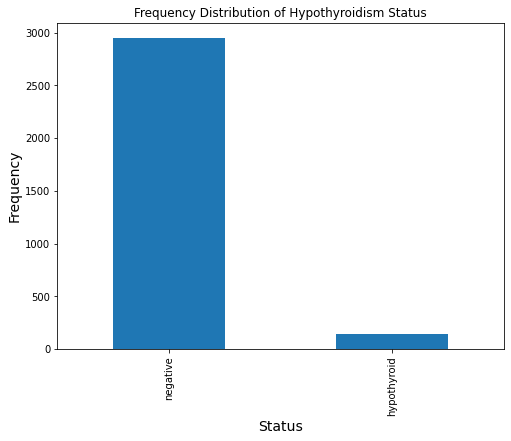

In [ ]:
#Checking status type value counts
fig, ax = plt.subplots(figsize = (8,6))

patient['status'].value_counts().plot.bar(title = 'Frequency Distribution of Hypothyroidism Status')
plt.xlabel('Status', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

We see that a large number of population were diagnosed negative for hypothyroid test.

However, we will investigate more why hypothyroidism is still an issue despite the effort to deal with it.

In [ ]:
# we get proprotion of patient status
patient['sex'].value_counts(normalize=True)*100

#We now see that Hypothyroidism is more common in women than in men

F    70.328576
M    29.671424
Name: sex, dtype: float64

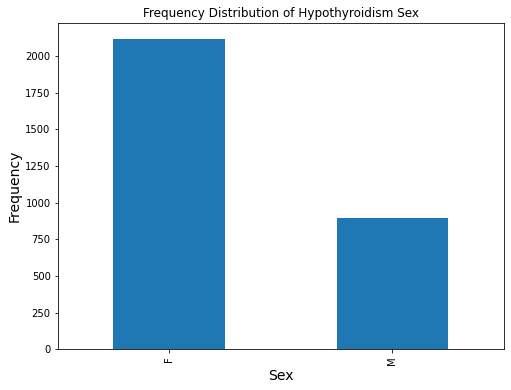

In [ ]:
#Checking status type value counts
fig, ax = plt.subplots(figsize = (8,6))

patient['sex'].value_counts().plot.bar(title = 'Frequency Distribution of Hypothyroidism Sex')
plt.xlabel('Sex', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

We see that female are mostly affected compared to men so we will further investigate more on female.

In [ ]:
# we get proprotion of women status since they are most affected
patient['pregnant'].value_counts(normalize=True)*100

f    98.023331
t     1.976669
Name: pregnant, dtype: float64

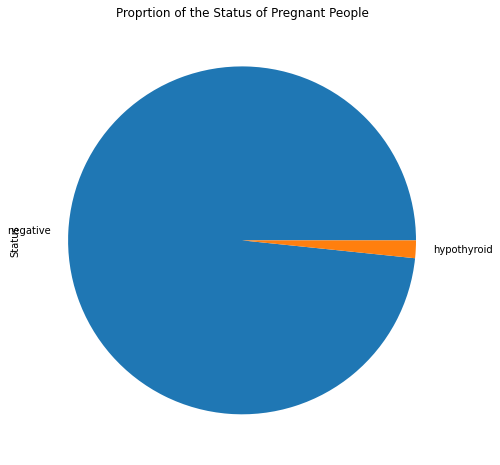

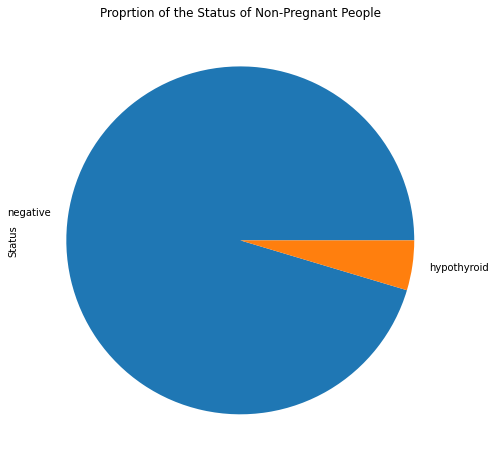

In [ ]:
#we investigate the proportion of status of the female who are pregnant and those that are not.
fig, ax = plt.subplots(figsize = (10, 8))

patient[patient['pregnant'] == 't']['status'].value_counts().plot.pie(title = 'Proprtion of the Status of Pregnant People')
plt.ylabel('Status')
plt.show()


fig, ax = plt.subplots(figsize = (10, 8))
patient[patient['pregnant'] == 'f']['status'].value_counts().plot.pie(title = 'Proprtion of the Status of Non-Pregnant People')
plt.ylabel('Status')
plt.show()

We see that non-pregnant women are more affected by thyroidism and this could be because it cut across all ages so we are going to conduct more investigations.

In [ ]:
#we calculate the mean of the numeric features

for col in numeric:
  print(patient[[col]].mean())

age    51.112538
dtype: float64
TSH    5.80932
dtype: float64
T3    1.933666
dtype: float64
TT4    108.706922
dtype: float64
T4U    0.977559
dtype: float64
FTI    115.48908
dtype: float64
TBG    31.07012
dtype: float64


In [ ]:
# Determining the mode of each of the numeric features
for col in numeric:
  print(patient[[col]].mode())

#T3 is a bimodal feature having the mode values 1.6 and 1.8
#TBG is a multimodal feature with the mode values 21, 23, 25 and 28

    age
0  59.0
   TSH
0  0.0
    T3
0  1.6
1  1.8
    TT4
0  98.0
    T4U
0  0.98
    FTI
0  98.0
    TBG
0  21.0
1  23.0
2  25.0
3  28.0


In [ ]:
# Identifying the median 
for col in numeric:
  print(patient[[col]].median())

age    54.0
dtype: float64
TSH    0.7
dtype: float64
T3    1.8
dtype: float64
TT4    104.0
dtype: float64
T4U    0.96
dtype: float64
FTI    107.0
dtype: float64
TBG    28.0
dtype: float64


In [ ]:
#Describe numerical variables
#
patient.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2648.000000,2631.000000,2406.000000,2846.000000,2847.000000,2848.000000,251.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080,31.070120
std,19.275099,24.023192,0.979488,44.606704,0.225796,60.147649,19.421922
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.200000,2.300000,127.000000,1.060000,129.000000,33.500000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


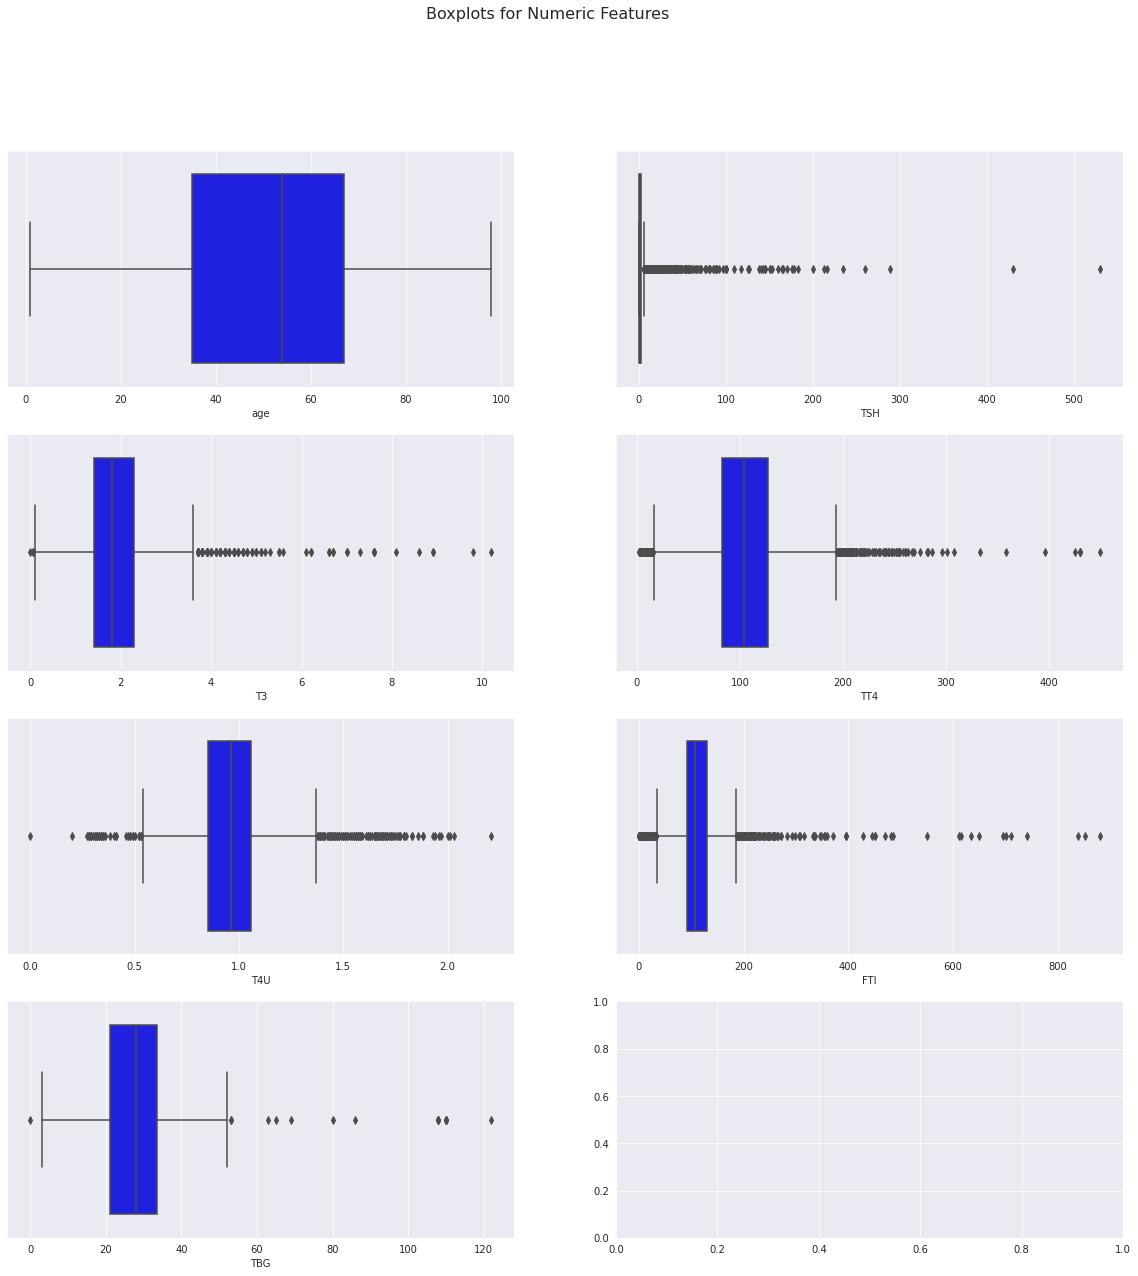

In [ ]:
# For the purpose of imputing missing values later,
# we will use boxplots to detect the presence of outliers in the features

sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 20))
for ax, data, name in zip(axes.flatten(), patient, numeric):
  sns.boxplot(patient[name], color = 'blue', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

We see that apart from Age column all other features have outliers. Since outliers do affect imputation of null values we will impute missing values with median since its not affected by presence of outliers as compared to the mean value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9b676ba90>,
      dtype=object)

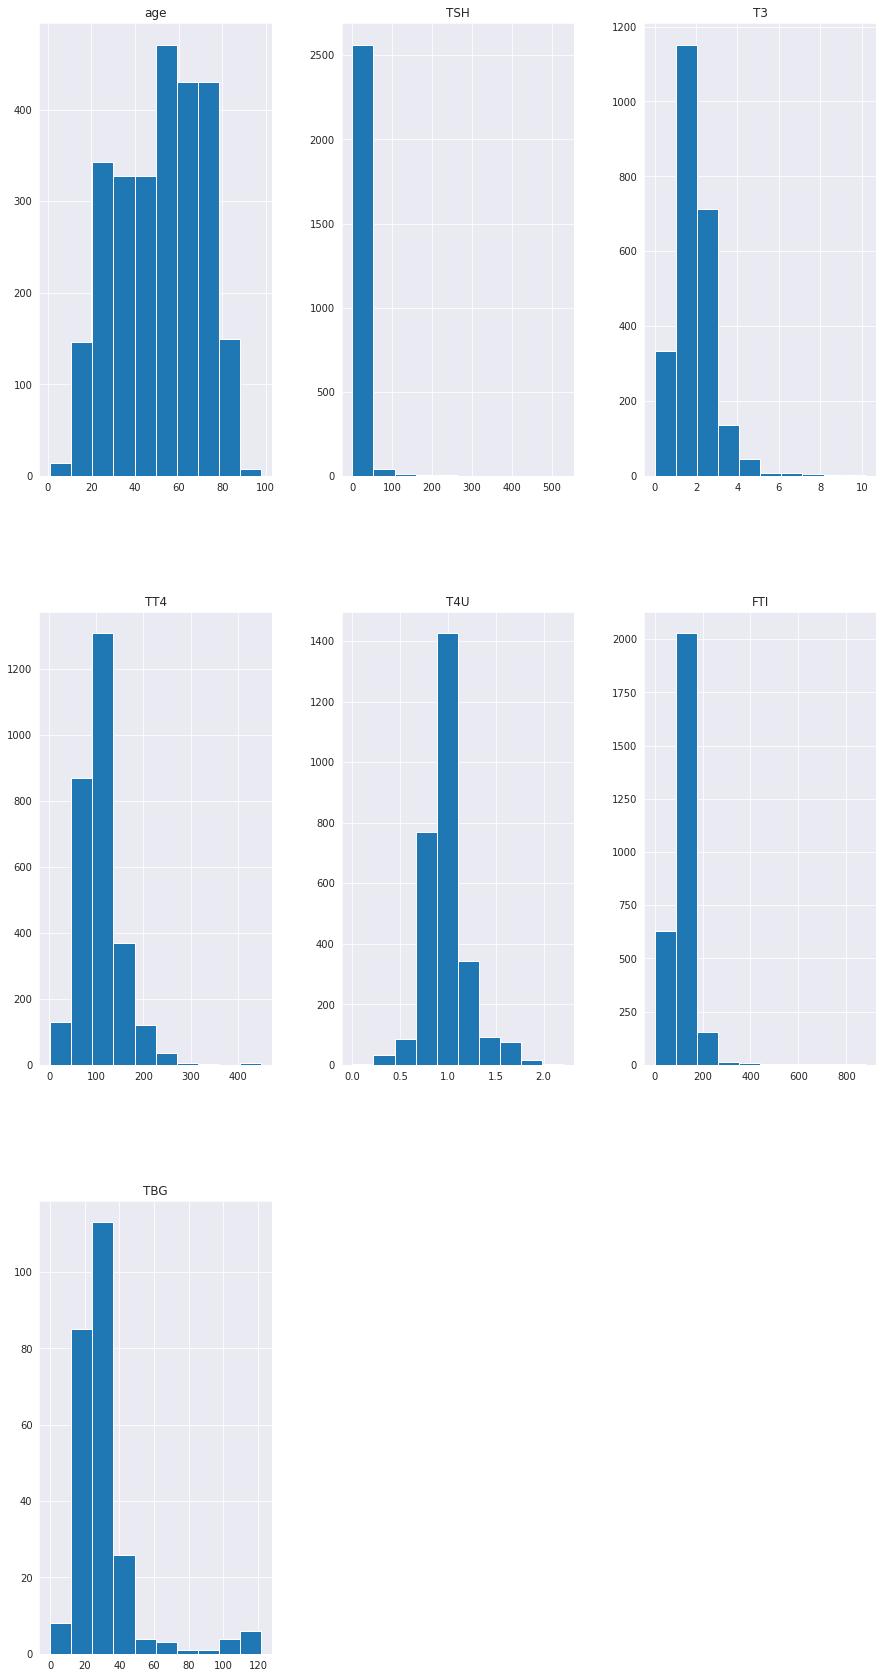

In [ ]:
#we check for data distribution
patient.hist(bins=10, figsize=[15,30])

Our data doesnot follow the Gaussian distribution except for Age column.

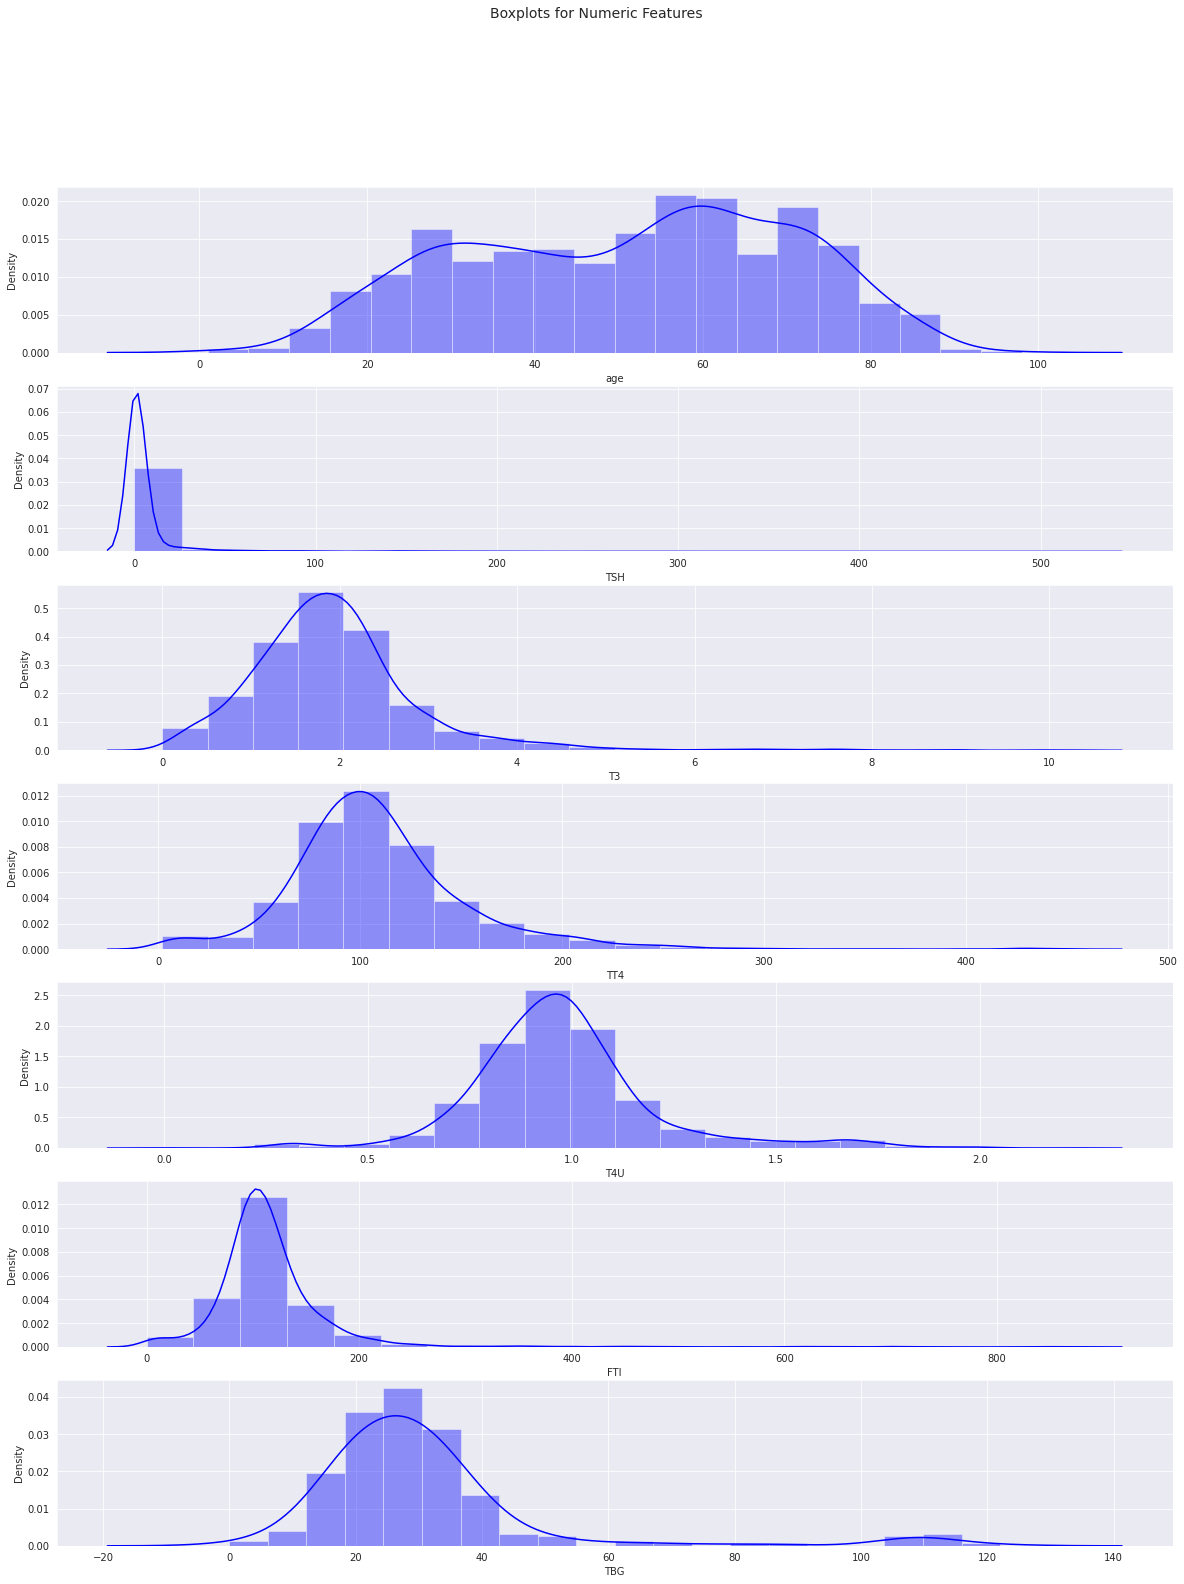

In [ ]:
# plot histograms for all numeric columns
# save the column names onto a dictionary
columns_dict = {'age':1, 'TSH':2, 'T3':3, 'TT4':4, 'T4U':5, 'FTI':6, 'TBG':7}
fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 25))
for ax, name, data in zip(axes.flatten(), numeric, columns_dict):
  sns.distplot(patient[name], hist = True, ax = ax, bins = 20, color = 'blue')
  plt.suptitle('Boxplots for Numeric Features', fontsize = 14)
  plt.subplots_adjust()

Apart from the Age feature all other features are skewed to the right indicating that majority of the values lies in the upper range.

**b. Bivariate Analysis**

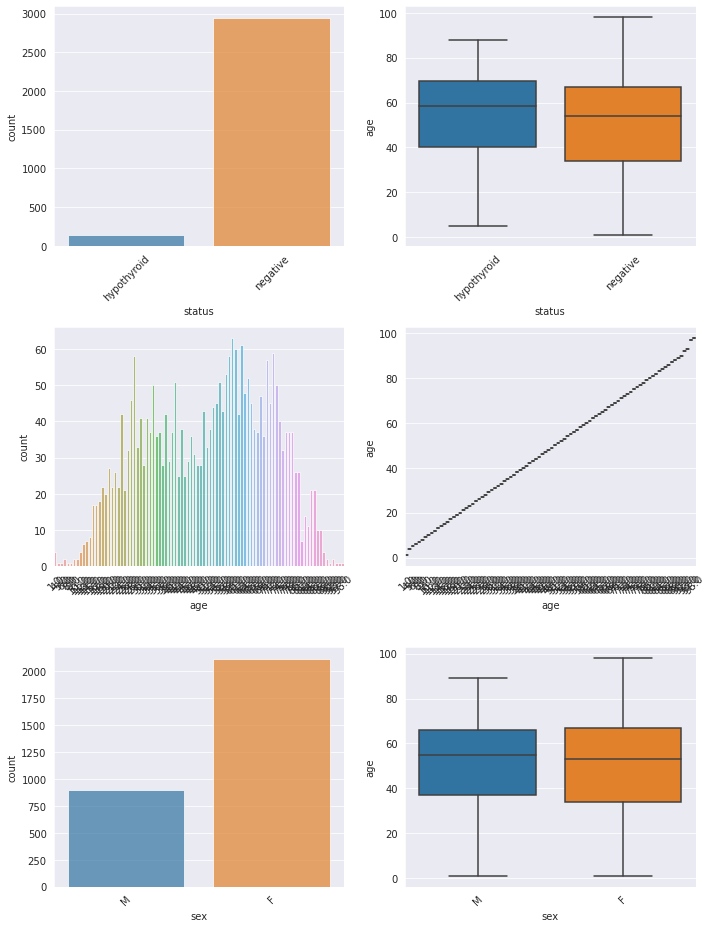

In [ ]:
#Categoric Feature Analysis
# Boxplot gives a good idea about how the Price is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=patient.columns[c], alpha=0.7, data=patient, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = patient, x=patient.columns[c], y='age', ax=ax)
        c = c + 1
fig.tight_layout()

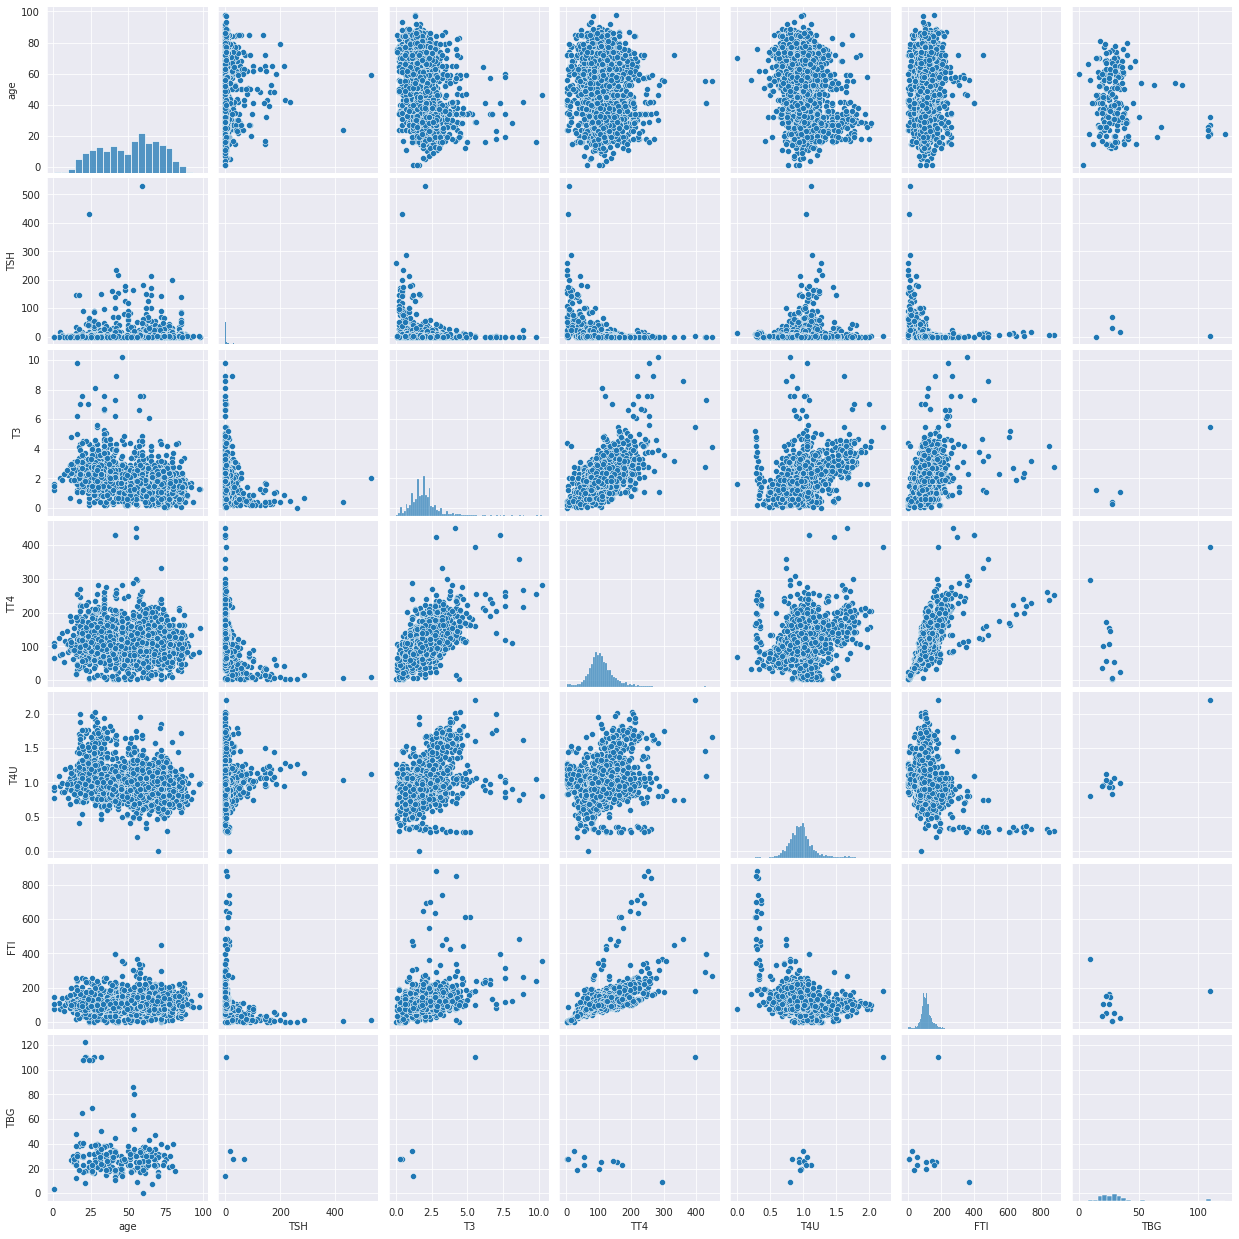

In [ ]:
# Ploting the bivariate summaries and recording our observations
# we use a pairplot to check for correlation between variables
#
sns.pairplot(patient, kind = 'scatter', dropna = False)
plt.show()

In [ ]:
#Tabulating the correlation coefficients
corr = patient.corr()
corr

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.009034,-0.330379,-0.097944,-0.220104,0.031579,-0.171020
TSH,-0.009034,1.000000,-0.184436,-0.321660,0.074867,-0.261213,-0.352416
T3,-0.330379,-0.184436,1.000000,0.590541,0.409381,0.314971,0.951505
TT4,-0.097944,-0.321660,0.590541,1.000000,0.320452,0.677444,0.569442
T4U,-0.220104,0.074867,0.409381,0.320452,1.000000,-0.294470,0.963883
FTI,0.031579,-0.261213,0.314971,0.677444,-0.294470,1.000000,0.028285
TBG,-0.171020,-0.352416,0.951505,0.569442,0.963883,0.028285,1.000000


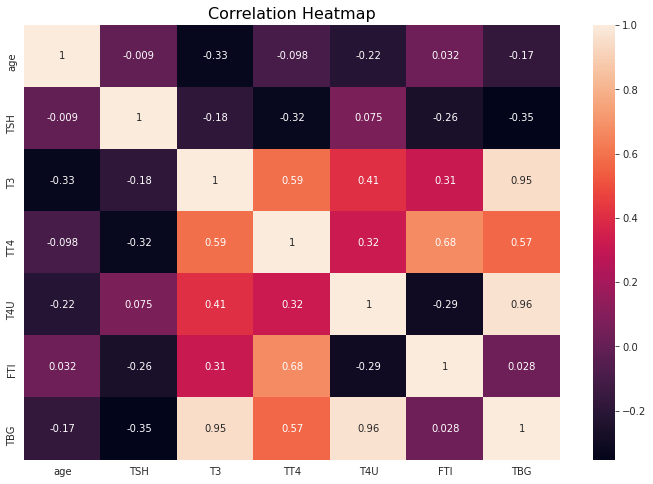

In [ ]:
#We create a heatmap to visualize the degree of correlation between variables

corr = patient.corr()
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(corr,
          xticklabels = corr.columns.values,
          yticklabels = corr.columns.values,
          annot=True)
plt.title('Correlation Heatmap', color = 'black', fontsize = 16)
plt.show()

From the above heat map we can infer that the following pairs of features have a positive correlation with a value above 0.5. These pairs include the following:

*   T3 and TT4
*   TT4 and TBG

Also, the following features have a negative correlation with values below 0.25:

*   TSH and TBG
*   TT4 and TSH
*   T3 and Age
*   T4U and FTI






In [ ]:
#we create a list to hold all categorical features
columns=['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

**Dealing with missing values**

We fail to impute missing values with estimate. This is because for classification models using decision trees are not affected by missing values and outliers etc.

Therefore we will replace missing values with 0.

In [ ]:

# Filling the missing values of numeric features
#
for col in numeric:
  patient.fillna(0, inplace = True)
  
# For categorical features
#
cat =  ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium',
       'goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

for i in cat:
  patient.fillna('missing', inplace = True)

In [ ]:
# we check for missing values
patient.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

#9.Implementing the solution

**a. Decision Trees**

 **Random Forest**

In [ ]:
# Encoding the categorical columns before fitting the data into the model
#
patient= pd.get_dummies(patient, columns = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                                 'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick',
                                 'tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured',
                                 'FTI_measured','TBG_measured'] )

In [ ]:
#preview the first five records
patient.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_0,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,0.0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [ ]:
#separating independent and dependent variable

X = patient.drop('status', axis = 1)

y = patient.status

In [ ]:
#splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.head(15)

,Actual,Predicted
597,negative,negative
1990,negative,negative
1430,negative,negative
2632,negative,negative
2644,negative,negative
2417,negative,negative
29,hypothyroid,negative
2833,negative,negative
2941,negative,negative
2723,negative,negative


In [ ]:
# Evaluating the model
# Assessing the errors
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9892008639308856


In [ ]:
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
# Hyperparameter tuning the RandomForestClassifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [40, 50, 60, 70, 80], 'min_samples_split':[2, 3, 6, 4, 5 ], 'max_depth' : [4, 5, 8, 10]}

forest = RandomForestClassifier()

search = GridSearchCV(forest, scoring = 'accuracy', param_grid=params, cv = 10)

search.fit(X, y)

search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

In [ ]:
# Fitting the best parameters to the model and observe the performance

forest = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', max_depth = 10, min_samples_split = 2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)


# Evaluating the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9870410367170627


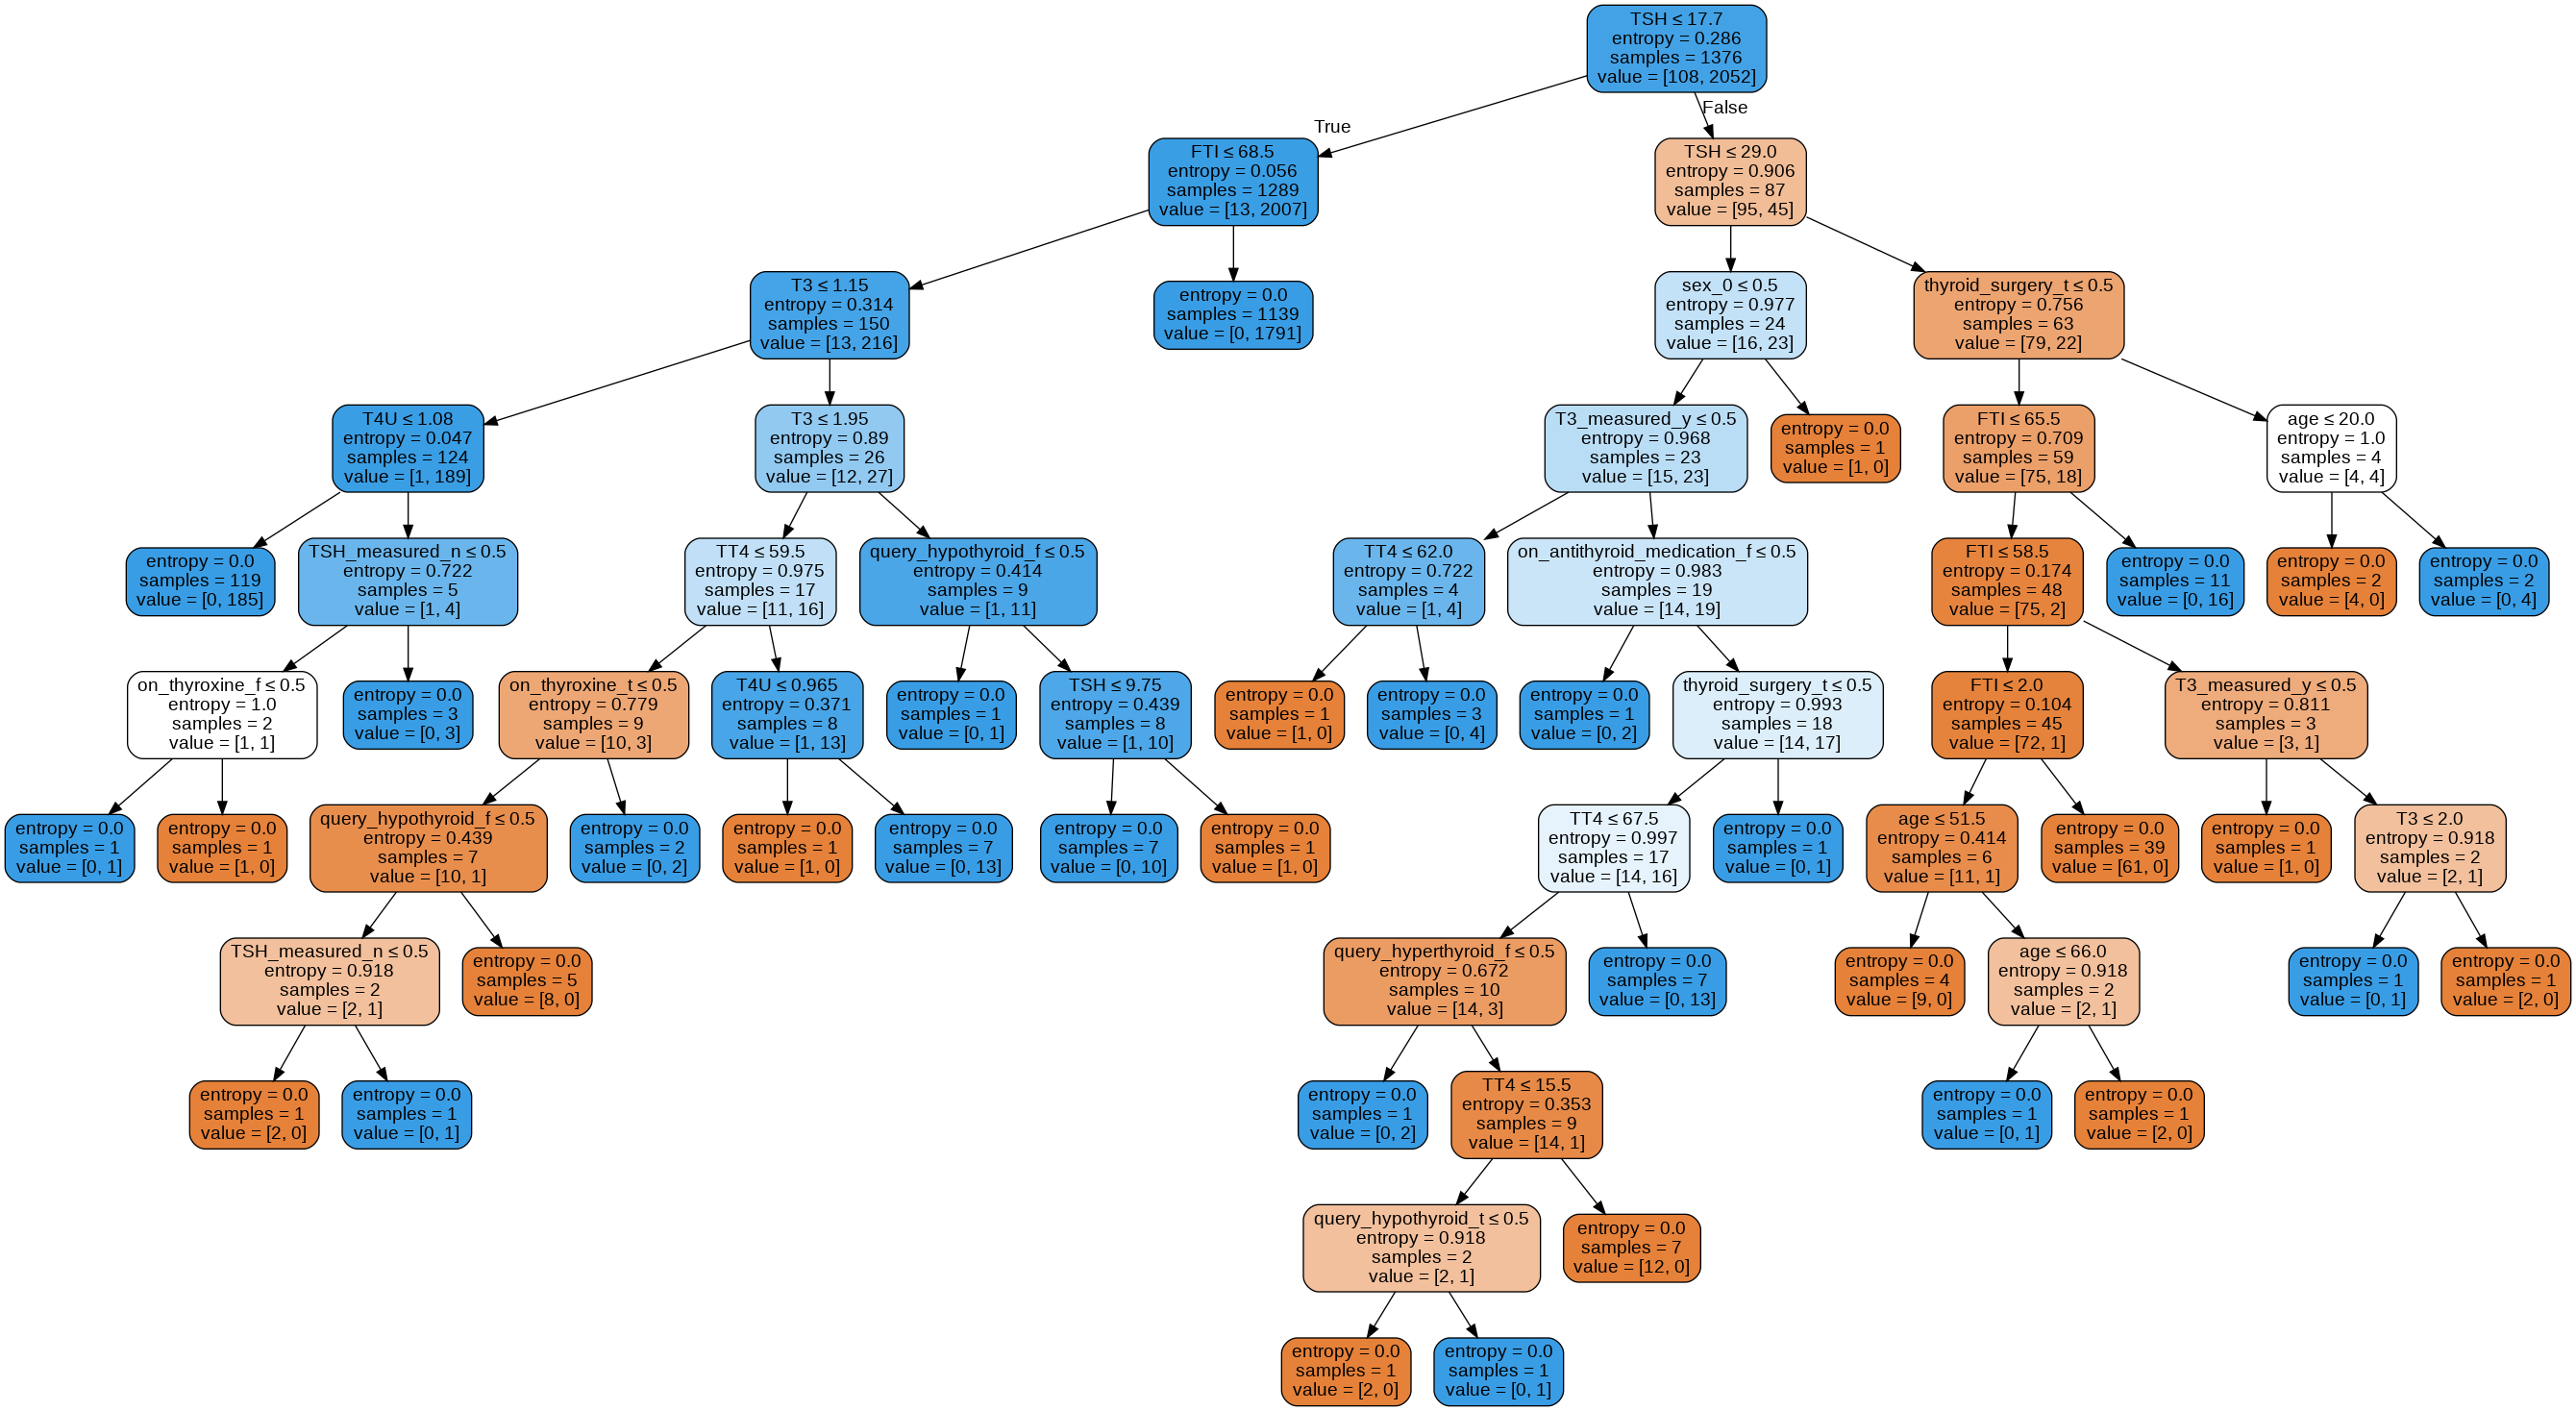

In [ ]:

# visualizing a tree from the random forest

dot_data = StringIO()

# picking a specific tree from the forest
my_tree = forest.estimators_[2]

export_graphviz(my_tree, out_file = dot_data, filled = True, rounded = True,
              special_characters = True, feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

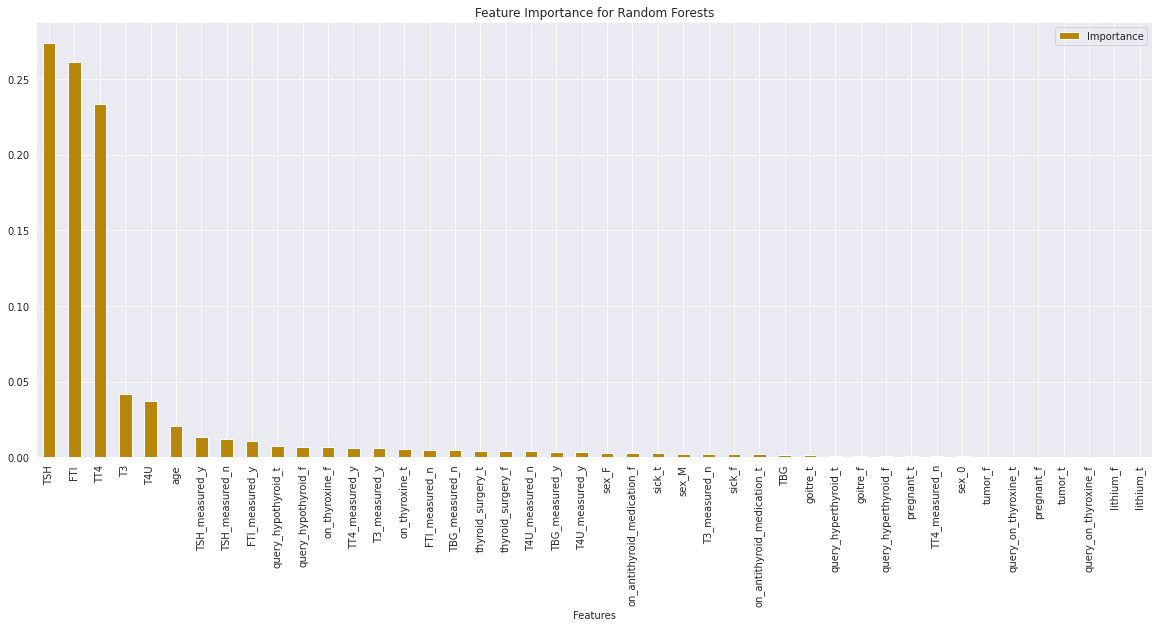

In [ ]:
# Getting the feature importance
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkgoldenrod')
plt.show()

The top five features of the Random Forest Model are:

*   FTI

*   TSH

*   TT4

*  T3

*  T4U

**Adaboost Trees**

In [ ]:
#Optimizing the RandomForestClassifier Using the Adaboost
#
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [ ]:
# Checking the accuracy of the prediction
#
print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))

Accuracy: 0.990280777537797


In [ ]:
params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

#No need to tune the hyperparameter as the one used before gives optimal prediction

{'n_estimators': 300}

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))

Accuracy: 0.9870410367170627


*Feature importance of adaboost trees*

In [ ]:
ada_boost.feature_importances_

array([0.10333333, 0.21333333, 0.07666667, 0.17666667, 0.15666667,
       0.15      , 0.        , 0.00333333, 0.        , 0.        ,
       0.00333333, 0.02666667, 0.00333333, 0.        , 0.01333333,
       0.02333333, 0.00333333, 0.        , 0.01      , 0.01333333,
       0.        , 0.        , 0.        , 0.00333333, 0.00666667,
       0.00333333, 0.        , 0.        , 0.        , 0.        ,
       0.00333333, 0.        , 0.00333333, 0.        , 0.        ,
       0.00333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

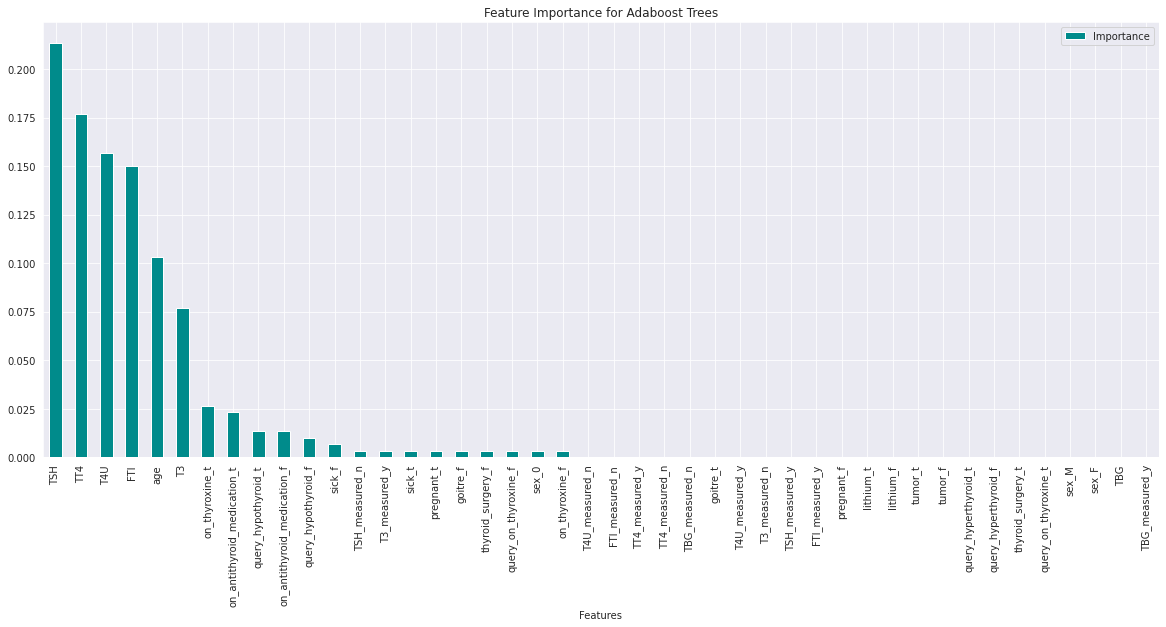

In [ ]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : ada_boost.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Adaboost Trees',figsize = (20, 8), color = 'darkcyan')
plt.show()

The top five important features in predicting outcome in the Adaboost Model are: 

*  TSH

*  TT4

*  T4U

*  FTI

*  Age

For the decision trees, the adaboost has a slightly higher accuracy score of 98.92% when compared with the random forest with an accuracy score of 98.7%.

b. **SVM model**

Feature selection: We will use the FTI, TSH and TT4 columns because they are the features with the highest importance.

In [ ]:
#preview the columns
patient.columns

Index(['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_0',
       'sex_F', 'sex_M', 'on_thyroxine_f', 'on_thyroxine_t',
       'query_on_thyroxine_f', 'query_on_thyroxine_t',
       'on_antithyroid_medication_f', 'on_antithyroid_medication_t',
       'thyroid_surgery_f', 'thyroid_surgery_t', 'query_hypothyroid_f',
       'query_hypothyroid_t', 'query_hyperthyroid_f', 'query_hyperthyroid_t',
       'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'TSH_measured_n',
       'TSH_measured_y', 'T3_measured_n', 'T3_measured_y', 'TT4_measured_n',
       'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y', 'FTI_measured_n',
       'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y'],
      dtype='object')

In [ ]:

# Selecting the independent variables and the target variable
#
X = patient[['FTI', 'TSH' , 'TT4']]
y =patient['status']


# Defining the various SVM models to use for classification

pol = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names

model = [pol, linear, rbf]
names = ['Polynomial', 'Linear', 'RRBF']


# Creating a function that will fit the data and train it, predict using the test features and give an accuracy score for each model
# We will pass the model, the independent and dependent variables as our function parameters

def SVM(model, X, y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Splitting the data into training and testing sets
  sc = StandardScaler()  # Standardising our data
  
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  model.fit(X_train, y_train) # Training the model and making predictions
  
  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)# Evaluating the model performance
  
  return accuracy, model      # Promting the function to return the accuracy and the model name


for model, name in zip(model, names):
  print(f'The accuracy of {name:<10} is: {SVM(model, X, y)[0]}')

The accuracy of Polynomial is: 0.9838012958963283
The accuracy of Linear     is: 0.978401727861771
The accuracy of RRBF       is: 0.9870410367170627


The RBF model predicts the output with the highest accuracy of 98.7.

For the tree models, the adaboost model is more trustworthy than the Random forest as the adaboost model takes into account the error of the previous tree when creating a new tree and aims at minimising those errors.

For the SVM models, the RBF model is the most reliable in this case.

#10.Challenging the solution

Based on the Predictive analysis further investigation and assessment is needed on both classification Model i.e Random Forest and SVM which would be provided to Nairobi Hospital.

#11. Follow up questions


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

d). Did we choose the right model?

#12. Recommendations

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.